<a href="https://colab.research.google.com/github/andriellymoraespereira/analise-de-visitas-em-ecommerce/blob/main/02_exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#  Acessar o arquivo do Google Drive

from google.colab import drive
drive.mount('/content/drive')

# Carregar o dataset a partir do Google Drive

df = pd.read_csv('/content/drive/MyDrive/cleaned_data.csv')

# Exibir as primeiras linhas do DataFrame para verificar se o arquivo foi carregado corretamente
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                  event_time event_type  product_id          category_id  \
0  2019-11-01 00:00:00+00:00       view     1003461  2053013555631882655   
1  2019-11-01 00:00:00+00:00       view     5000088  2053013566100866035   
2  2019-11-01 00:00:01+00:00       view    17302664  2053013553853497655   
3  2019-11-01 00:00:01+00:00       view     3601530  2053013563810775923   
4  2019-11-01 00:00:01+00:00       view     1004775  2053013555631882655   

               category_code   brand   price    user_id  \
0     electronics.smartphone  xiaomi  489.07  520088904   
1  appliances.sewing_machine  janome  293.65  530496790   
2                    Unknown   creed   28.31  561587266   
3  appliances.kitchen.washer      lg  712.87  518085591   
4     electronics.smartphone  xiaomi  183.27  558856683   

                           user_session  
0  4d3b30da-a5e4-

In [ ]:
# Informações básicas do DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997407 entries, 0 to 4997406
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 343.1+ MB
None


In [ ]:
# Estatísticas descritivas
print(df.describe())

         product_id   category_id         price       user_id
count  4.997407e+06  4.997407e+06  4.997407e+06  4.997407e+06
mean   1.082551e+07  2.057728e+18  2.947184e+02  5.353039e+08
std    1.217100e+07  1.923921e+16  3.512965e+02  2.024985e+07
min    1.000978e+06  2.053014e+18  0.000000e+00  2.144703e+08
25%    1.005229e+06  2.053014e+18  6.947000e+01  5.159667e+08
50%    5.100378e+06  2.053014e+18  1.700700e+02  5.306437e+08
75%    1.600103e+07  2.053014e+18  3.694500e+02  5.546497e+08
max    6.170001e+07  2.180737e+18  2.574070e+03  5.673604e+08


**Distribuição de Eventos por Tipo**

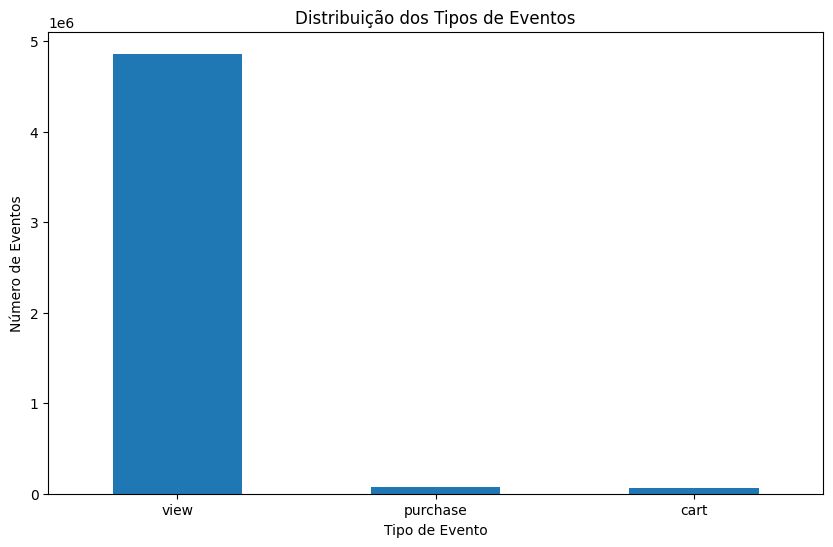

In [ ]:
# Contar o número de eventos por tipo
events_per_type = df['event_type'].value_counts()

# Plotar a distribuição dos tipos de eventos
plt.figure(figsize=(10, 6))
events_per_type.plot(kind='bar')
plt.title('Distribuição dos Tipos de Eventos')
plt.xlabel('Tipo de Evento')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=0)
plt.show()

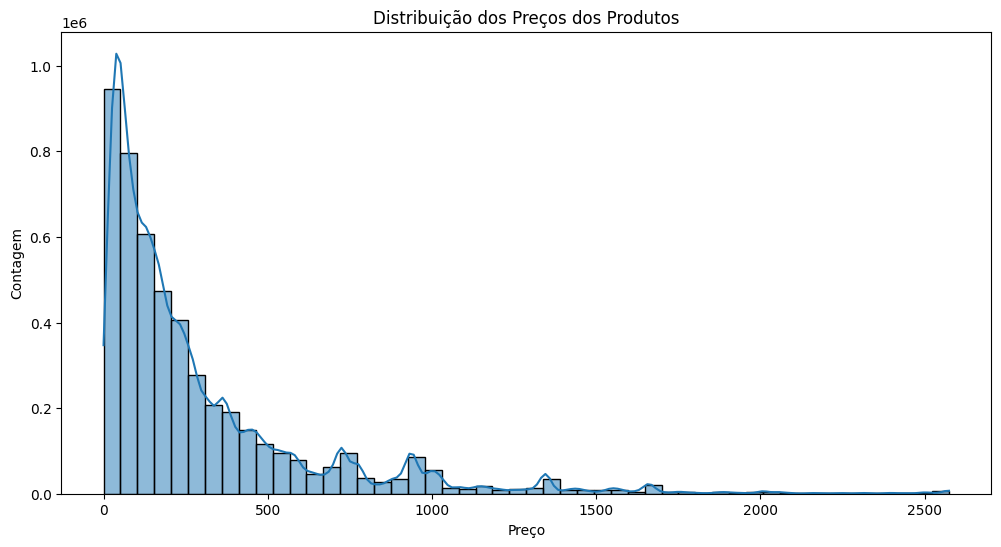

In [ ]:
# Plotar a distribuição dos preços
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribuição dos Preços dos Produtos')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.show()

count    643539.000000
mean          7.765508
std          13.518978
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max        1164.000000
Name: count, dtype: float64


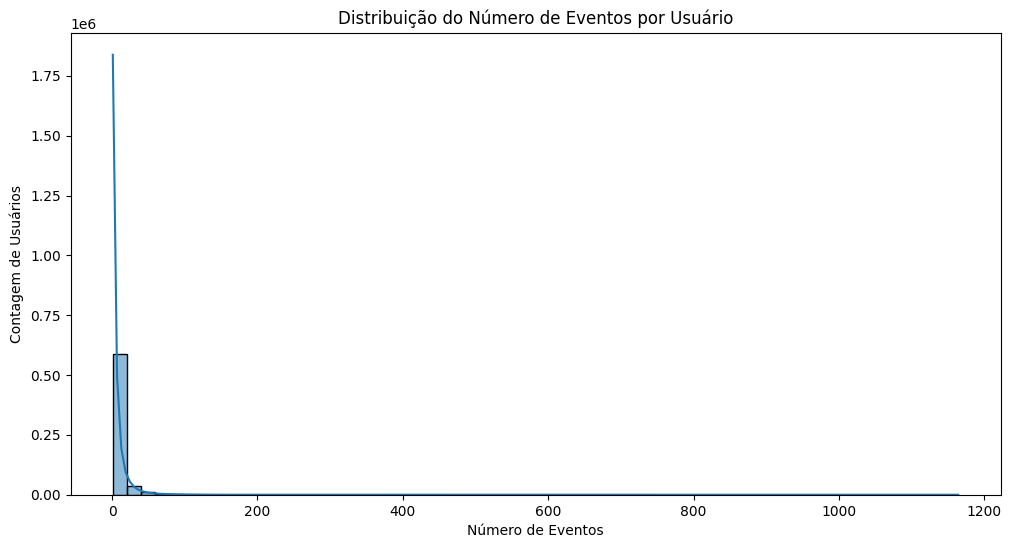

In [ ]:
# Contar o número de eventos distintos por usuário
user_event_counts = df['user_id'].value_counts()
print(user_event_counts.describe())

# Plotar a distribuição do número de eventos por usuário
plt.figure(figsize=(12, 6))
sns.histplot(user_event_counts, bins=50, kde=True)
plt.title('Distribuição do Número de Eventos por Usuário')
plt.xlabel('Número de Eventos')
plt.ylabel('Contagem de Usuários')
plt.show()


**Produtos Mais Populares**

**Análise por Categoria de Produto**

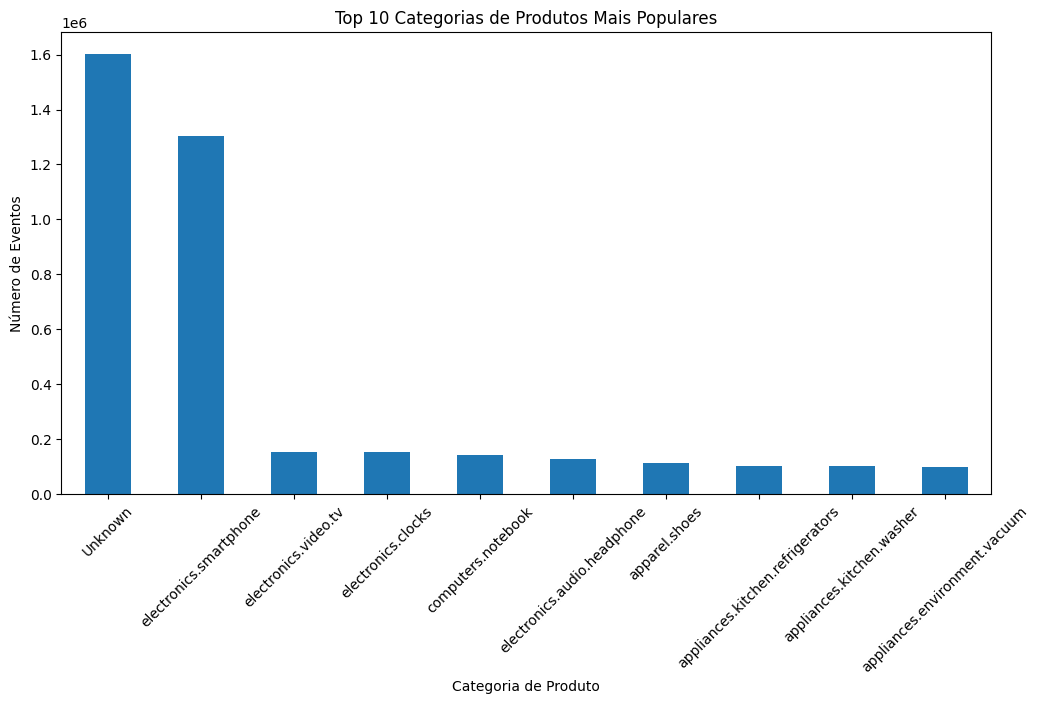

In [ ]:
# Contar o número de eventos por categoria de produto
events_per_category = df['category_code'].value_counts().head(10)

# Plotar as categorias de produtos mais populares
plt.figure(figsize=(12, 6))
events_per_category.plot(kind='bar')
plt.title('Top 10 Categorias de Produtos Mais Populares')
plt.xlabel('Categoria de Produto')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.show()


**Análise por Marca**

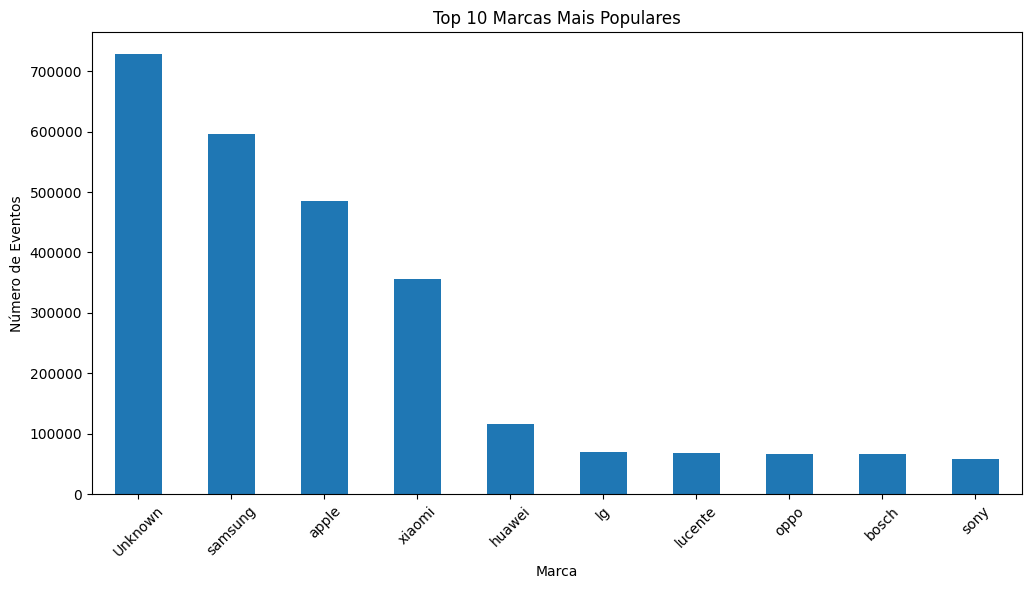

In [ ]:
# Contar o número de eventos por marca
events_per_brand = df['brand'].value_counts().head(10)

# Plotar as marcas mais populares
plt.figure(figsize=(12, 6))
events_per_brand.plot(kind='bar')
plt.title('Top 10 Marcas Mais Populares')
plt.xlabel('Marca')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.show()




Para realizar uma análise exploratória da variável id_session, vamos examinar várias métricas, como a distribuição da quantidade de eventos por sessão, o número de sessões únicas, a duração média das sessões (se os timestamps estiverem disponíveis), e outras estatísticas descritivas.

In [ ]:
# Estatísticas descritivas
session_counts = df['user_session'].value_counts()
print("Estatísticas Descritivas de user_session:")
print(session_counts.describe())

Estatísticas Descritivas de user_session:
count    1.104188e+06
mean     4.525866e+00
std      6.510252e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      5.000000e+00
max      5.040000e+02
Name: count, dtype: float64


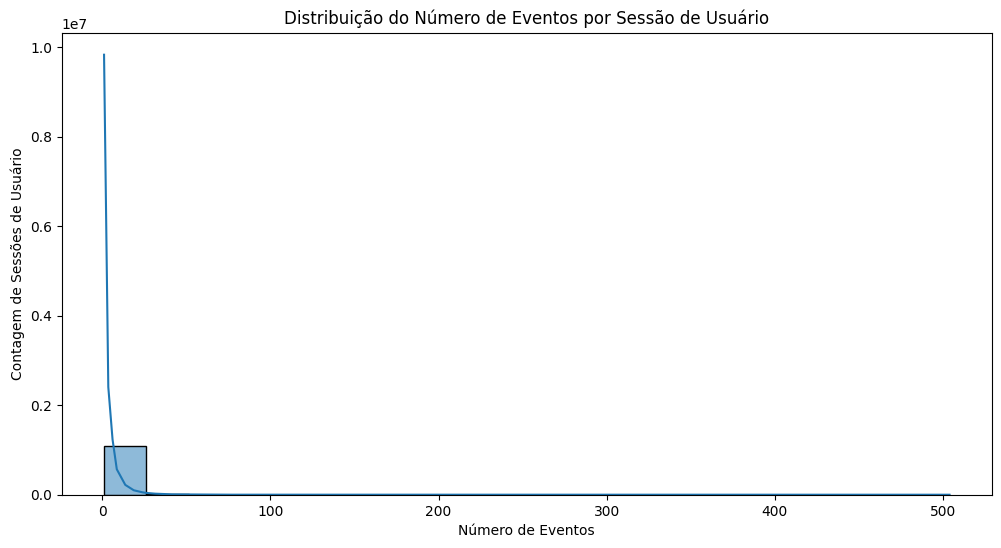

In [ ]:
# Plotar a distribuição do número de eventos por sessão de usuário
plt.figure(figsize=(12, 6))
sns.histplot(session_counts, bins=20, kde=True)
plt.title('Distribuição do Número de Eventos por Sessão de Usuário')
plt.xlabel('Número de Eventos')
plt.ylabel('Contagem de Sessões de Usuário')
plt.show()


In [ ]:
# Número de sessões únicas por usuário
unique_user_sessions = df['user_session'].nunique()
print(f"Número de Sessões Únicas por Usuário: {unique_user_sessions}")


Número de Sessões Únicas por Usuário: 1104188
